# Clase computación estadística 09-05-2022



In [ ]:
!pip install pingouin

     |████████████████████████████████| 183 kB 7.5 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 9.8 MB 50.7 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.1-py3-none-any.whl size=194002 sha256=163d1b09ca0a57eb781ce137141e214fb82796d90693cb89082d206a6537dfc5
  Stored in directory: /root/.cache/pip/wheels/74/a7/b6/5b5f03b0395fdada1f45d3aed76e7da48873a02805545ef652
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=e9efd8273da55fb34f8787a481d50ae5aeb664e2ce71a174689d9da49950af1a
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsm

In [ ]:
import pingouin

In [ ]:
url='/content/Datos_CE.xlsx'
import pandas as pd
import pingouin as pg
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import seaborn as sns



In [ ]:
df1=pd.read_excel(url)
df1.head()

,genotipo,udc,cord_x,cord_y
0,gen1,5.201148,6,4
1,gen1,4.858160,6,3
2,gen1,4.862398,8,2
3,gen1,5.205114,5,9
4,gen1,4.943045,4,5


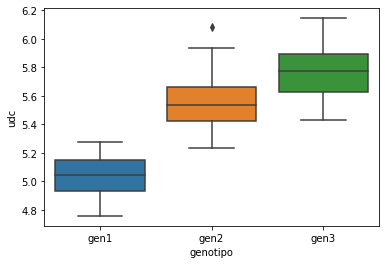

In [ ]:
sns.boxplot(data=df1,x='genotipo',y='udc')

In [ ]:
pg.anova(df1,dv='udc', between='genotipo')

,Source,ddof1,ddof2,F,p-unc,np2
0,genotipo,2,69,105.011055,1.163486e-21,0.752708


In [ ]:
from statsmodels.stats import anova
#metodo 2
formula=ols('udc~C(genotipo)',data=df1).fit()
anova_lm(formula)

,df,sum_sq,mean_sq,F,PR(>F)
C(genotipo),2.0,6.927300,3.463650,105.011055,1.163486e-21
Residual,69.0,2.275873,0.032984,NaN,NaN


In [ ]:
# Prueba de residualidad
#Supuesto
#NOrmalidad
pg.normality(formula.resid)
#igualdad de varianzas

df1['resid']=formula.resid
pg.homoscedasticity(data=df1,dv='resid',group='genotipo')

,W,pval,equal_var
levene,0.790028,0.457894,True


#índice de moran en Python